<a href="https://colab.research.google.com/github/Yael313255748/Time-Series/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tools.eval_measures import mse,rmse,meanabs
import numpy as np
%matplotlib inline


In [ ]:
series=pd.read_csv('/content/drive/MyDrive/Copia de ejercicios arma.csv')
series.head(5)

,Zt1,Zt2,Zt3,Zt4,Zt5,Zt6,Zt7,Zt8
0,-0.157284,0.046901,0.107852,-0.028946,0.003435,-0.002743,0.039342,-0.052298
1,0.215544,0.058501,0.101996,-0.040779,0.045876,0.035615,-0.004712,0.000422
2,-0.035830,0.031023,0.051983,-0.023065,0.058018,0.084654,0.212062,0.045848
3,-0.086040,0.051601,-0.011626,0.025080,-0.039228,0.053416,-0.211304,0.010906
4,0.016876,-0.014167,-0.110031,-0.005884,-0.000720,0.033396,-0.087085,0.034250


In [ ]:
Z=['Zt8']

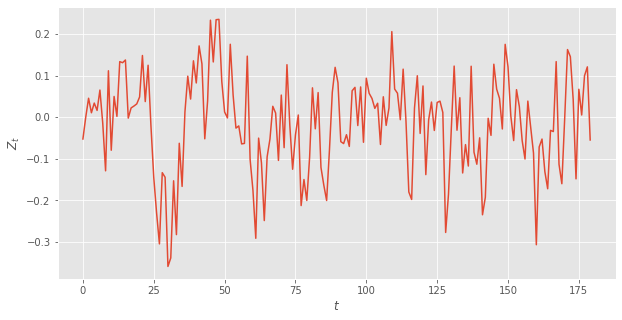

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(series[Z])
plt.xlabel('$t$')
plt.ylabel('$Z_t$');    

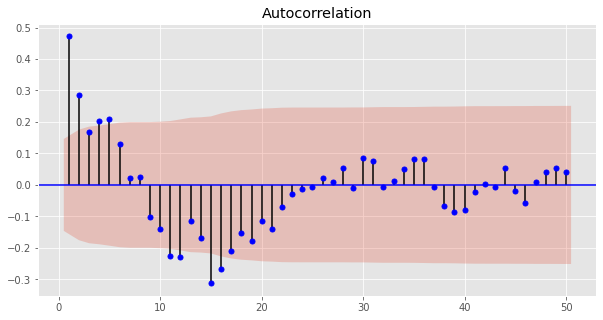

In [ ]:
fig=plot_acf(series[Z].values,zero=False,lags=50,c='b')
fig.set_figwidth(10.)
fig.set_figheight(5.)

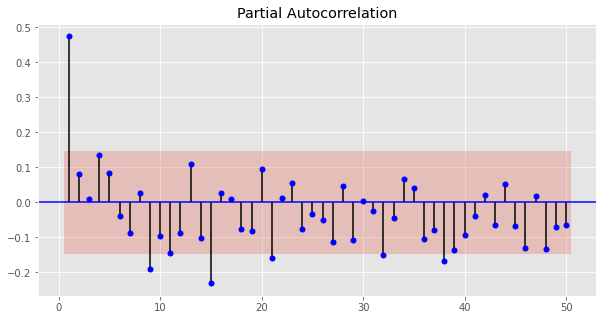

In [ ]:
fig=plot_pacf(series[Z].values,zero=False,lags=50,c='b')
fig.set_figwidth(10.)
fig.set_figheight(5.)

In [ ]:
names_models=['ARIMA(2,1,1)','ARIMA(1,1,1)','ARIMA(2,0,1)',
              'ARIMA(0,0,1)','ARIMA(1,0,0)','ARIMA(2,1,2)']
ord=[(2,1,1),(1,1,1),(2,0,1),(0,0,1),(1,0,0),(2,1,2)]
models=[]

In [ ]:
for i in range(len(names_models)):
  models.append(ARIMA(series[Z],order=ord[i]).fit())

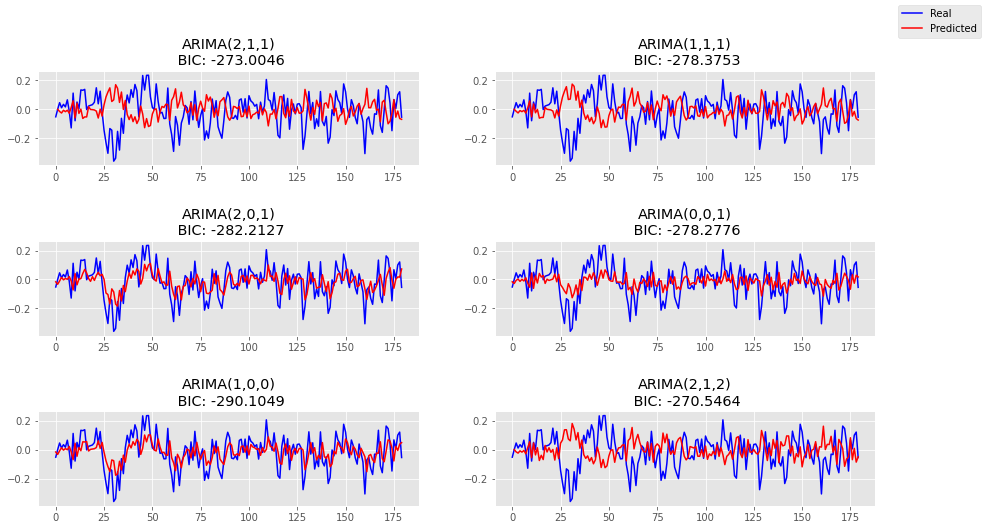

In [ ]:
fig,ax=plt.subplots(3,2)
fig.set_figwidth(15.)
fig.set_figheight(8.)
j=0
fig.subplots_adjust(hspace=0.8)
for i in fig.axes:
  ts_pred=models[j].predict().values.reshape(-1,1)
  ts=series[Z].values.reshape(-1,1)
  #MSE=round(mse(ts,ts_pred),5)
  i.plot(series[Z],c='b')
  i.plot(models[j].fittedvalues,c='r')
  i.set_title(names_models[j]+'\n BIC: {:.4f}'.format(models[j].bic))
  j+=1
fig.legend(['Real','Predicted'])
plt.show()

In [ ]:
best_model=models[2]

In [ ]:
best_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 -282.2127
Dependent Variable: Zt8              Log-Likelihood:      154.09   
Date:               2022-03-24 23:39 Scale:               1.0000   
No. Observations:   180              Method:              css-mle  
Df Model:           4                Sample:              0        
Df Residuals:       176                                   0        
Converged:          1.0000           S.D. of innovations: 0.103    
No. Iterations:     11.0000          HQIC:                -291.704 
AIC:                -298.1775                                      
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const       -0.0166     0.0148   -1.1179   0.2651   -0.0456    0.0125
ar.L1.Zt8   -0.4718     0.0834   -5.6571   0.0000   -0.6352   -0.3083
ar.L2.Zt8    0.4775     0.0665    7.1780   0.0000    0.3471    0.6079
ma.L1.Zt8    0.9338     0.0611   15.2845   0.0000    0.8141    1.0536
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -1.0351             0.0000           1.0351             0.5000
AR.2           2.0231             0.0000           2.0231             0.0000
MA.1          -1.0708             0.0000           1.0708             0.5000
===================================================================

"""

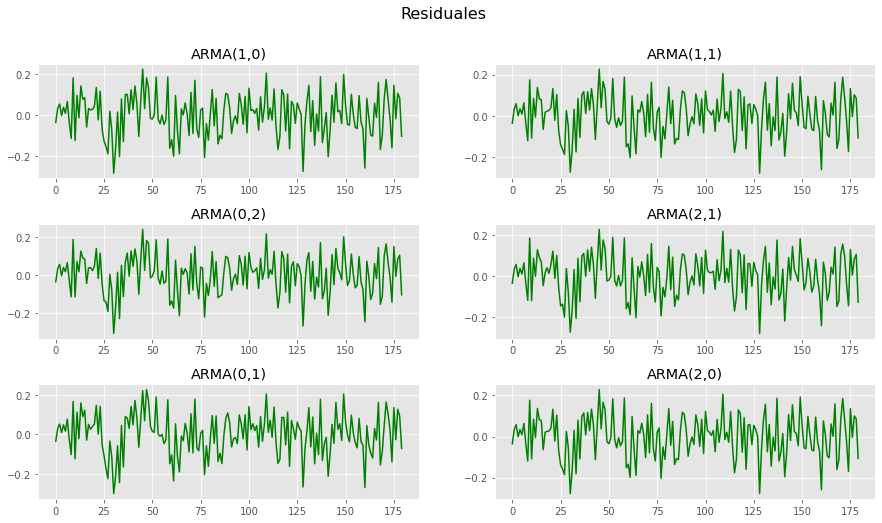

In [ ]:
fig,ax=plt.subplots(3,2)
fig.set_figwidth(15.)
fig.set_figheight(8.)
j=0
fig.suptitle('Residuales',fontsize=16)
fig.subplots_adjust(hspace=0.4)
for i in fig.axes:
  i.plot(models[j].resid,c='g')
  i.set_title(names_models[j])
  j+=1
plt.show()

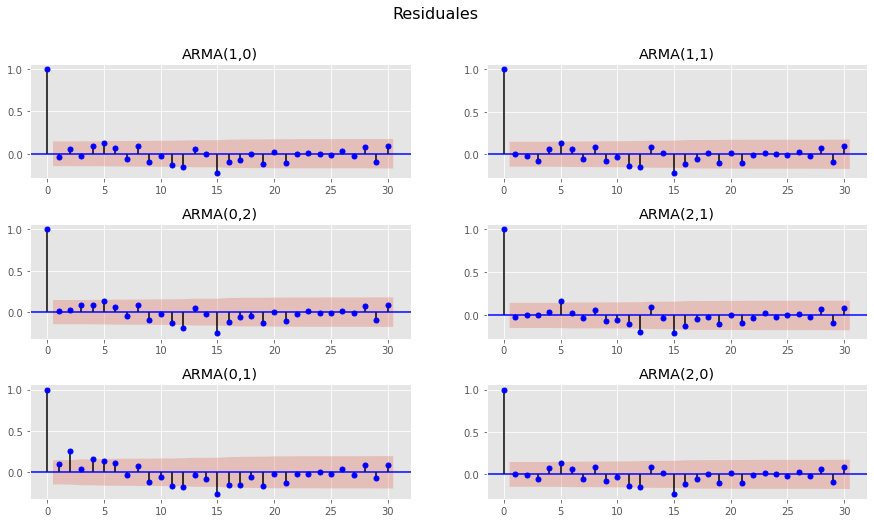

In [ ]:
fig,ax=plt.subplots(3,2)
fig.set_figwidth(15.)
fig.set_figheight(8.)
j=0
fig.suptitle('Residuales',fontsize=16)
fig.subplots_adjust(hspace=0.4)
for i in fig.axes:
  plot_acf(models[j].resid,zero=True,lags=30,c='b',title=names_models[j],ax=i)
  j+=1
plt.show()